In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('Fish.csv')
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


## Column명 변경

In [2]:
data.columns = ['Species', 'Weight','Vertical_length','Diagnol_length','Cross_length','Height','Width']
data.head()

,Species,Weight,Vertical_length,Diagnol_length,Cross_length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## 데이터의 모양

In [3]:
data.shape

(159, 7)

## 데이터에 NaN 데이터가 있는지 확인

In [4]:
data.isna().sum()

Species            0
Weight             0
Vertical_length    0
Diagnol_length     0
Cross_length       0
Height             0
Width              0
dtype: int64

## 물고기의 Vertical_length와 Weight의 관계

<AxesSubplot:xlabel='Vertical_length', ylabel='Weight'>

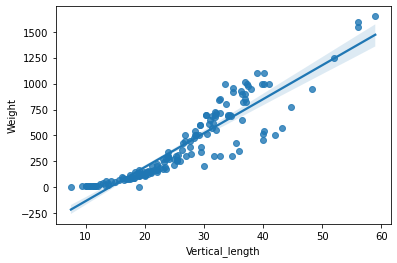

In [5]:
sns.regplot(x="Vertical_length",y='Weight',data=data)

## 물고기의 Diagnol_length와 Weight의 관계

<AxesSubplot:xlabel='Diagnol_length', ylabel='Weight'>

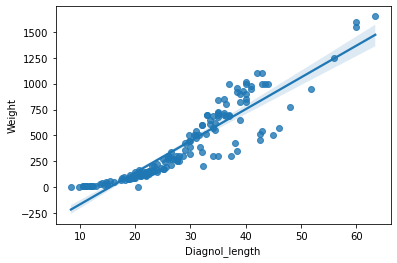

In [6]:
sns.regplot(x="Diagnol_length",y='Weight',data=data)

## 물고기의 Cross_length와 Weight의 관계

<AxesSubplot:xlabel='Cross_length', ylabel='Weight'>

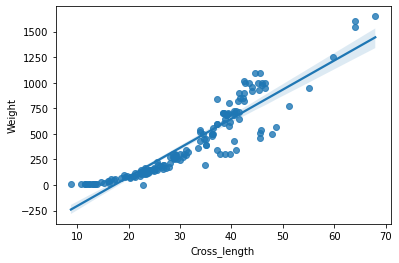

In [7]:
sns.regplot(x="Cross_length",y='Weight',data=data)

## 물고기의 Height와 Weight의 관계

<AxesSubplot:xlabel='Height', ylabel='Weight'>

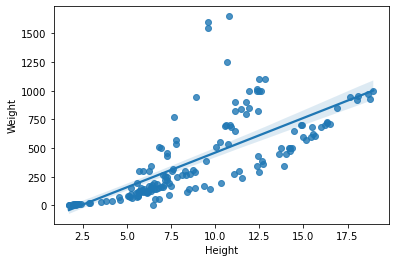

In [8]:
sns.regplot(x="Height",y='Weight',data=data)

## 물고기의 Width와 Weight의 관계

<AxesSubplot:xlabel='Width', ylabel='Weight'>

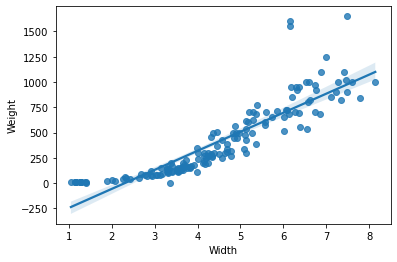

In [9]:
sns.regplot(x="Width",y='Weight',data=data)

## Column별 데이터 상관관계
### 위의 내용을 한줄로 표현 가능

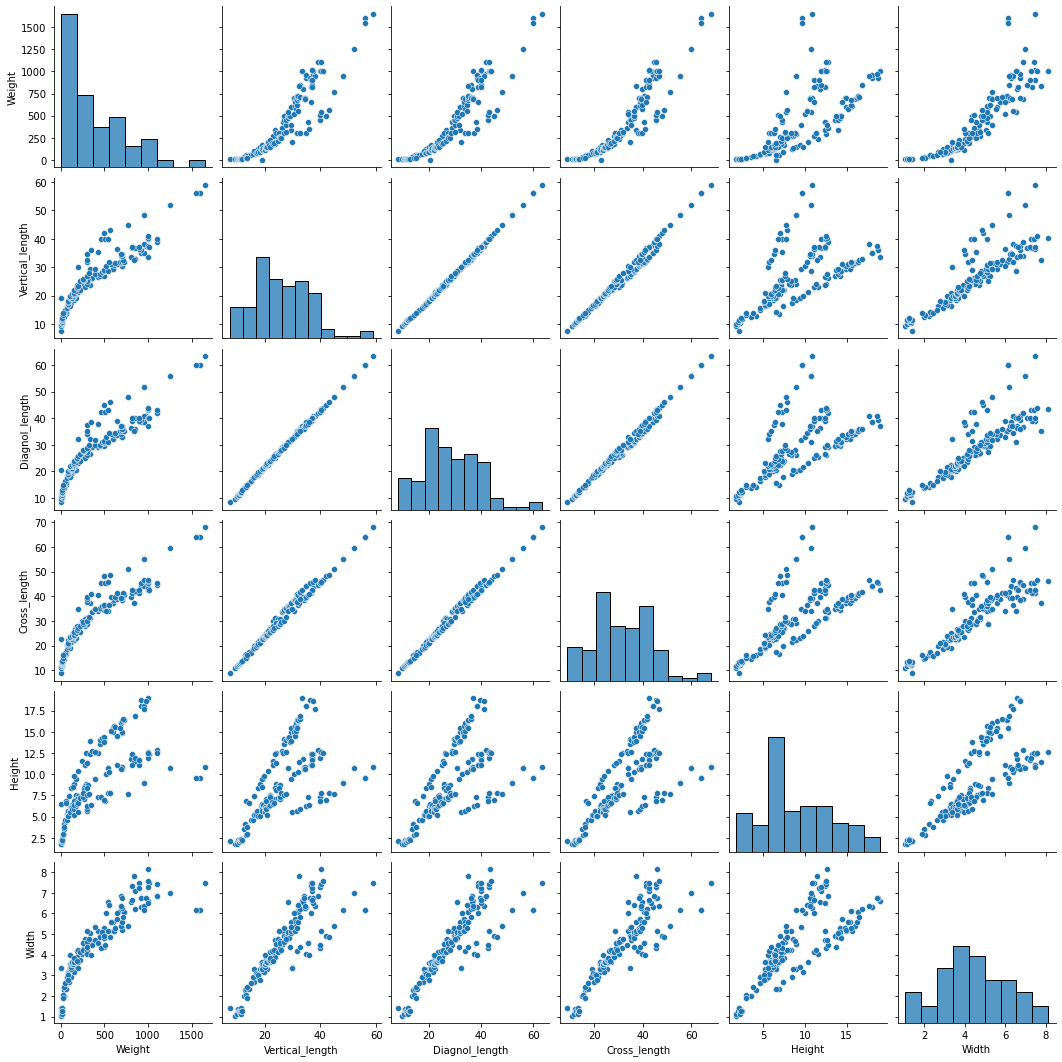

In [10]:
sns.pairplot(data=data)

## One hot encoding 으로 물고기의 종류 표현

In [11]:
fish = pd.get_dummies(data,columns=["Species"])
fish.head()

,Weight,Vertical_length,Diagnol_length,Cross_length,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


## 데이터 가공 후 모델 학습

In [12]:
x = fish.iloc[:,1:13].values
y = fish['Weight'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, random_state = 1)

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## 실제값과 예측값 비교

In [13]:
y_predict = model.predict(x_test)
result = {'y_value':y_test,'y_predict':y_predict,'y_gap':abs(y_test-y_predict)}
gap = pd.DataFrame(result)
gap

,y_value,y_predict,y_gap
0,1000.0,779.040320,220.959680
1,120.0,108.625819,11.374181
2,600.0,545.286835,54.713165
3,130.0,198.217968,68.217968
4,85.0,81.171351,3.828649
5,650.0,596.109024,53.890976
6,145.0,120.139408,24.860592
7,500.0,489.749244,10.250756
8,0.0,68.555012,68.555012
9,145.0,247.166473,102.166473


## 실제값과 예측값 그래프
#### 주황색 : 실제값 <br><br> 파란색 : 예측값

<AxesSubplot:ylabel='y_predict'>

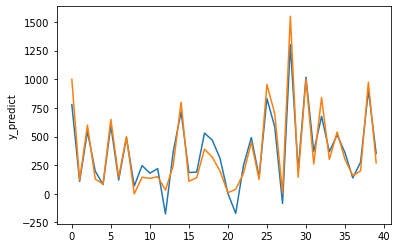

In [14]:
sns.lineplot(x=gap.index,y='y_predict',data=gap)
sns.lineplot(x=gap.index,y='y_value',data=gap)

## 오차 그래프

<AxesSubplot:ylabel='y_gap'>

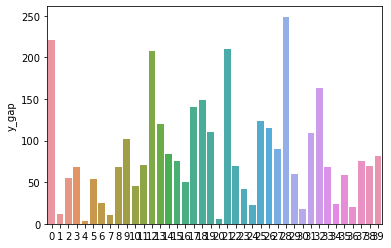

In [15]:
sns.barplot(x=gap.index,y='y_gap',data=gap)

## 정확도 확인

In [16]:
train_accuracy = model.score(x_train,y_train)
print("train_accuracy : " + str(round(train_accuracy*100,2)) + '%')
test_accuracy = model.score(x_test,y_test)
print("test_accuracy : " + str(round(test_accuracy*100,2)) + '%')

train_accuracy : 94.07%
test_accuracy : 91.51%


## H(x) 도출

In [17]:
weights = "y = "
i=1
for w in model.coef_:
    weights = weights + str(w) + "x" + str(i) + " + "
    i += 1
weights = weights + str(model.intercept_)
print(weights)

y = -77.54961986168236x1 + 79.82351542138129x2 + 32.07795277861008x3 + -7.3994057263976245x4 + 6.2737510059811274x5 + -52.459004414464694x6 + 101.23781326652465x7 + 34.41437004812724x8 + -374.3240236379121x9 + -7.1417599445060125x10 + 307.19797510149004x11 + -8.92537041925928x12 + -791.7343125834234
